In [1]:
pip install matplotlib

In [2]:
import matplotlib.pyplot as plt


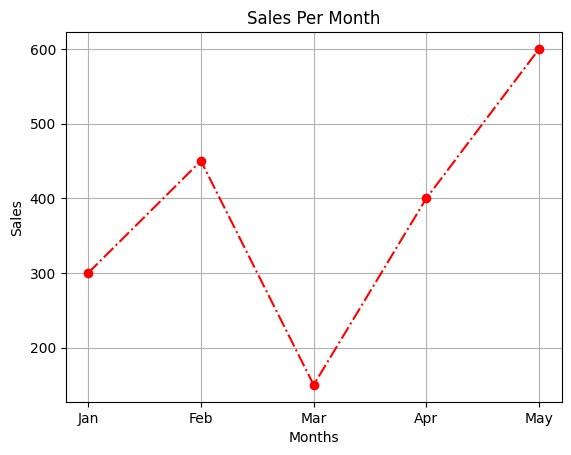

In [18]:
sales=[300,450,150,400,600]
months=['Jan','Feb','Mar','Apr','May']
plt.plot(months,sales,color='red',marker='o',linestyle='-.')
plt.grid(True)
plt.title('Sales Per Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

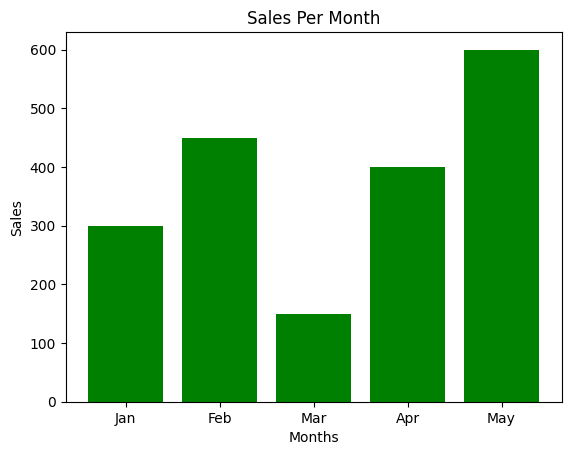

In [24]:
plt.bar(months,sales,color='green')
plt.title('Sales Per Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

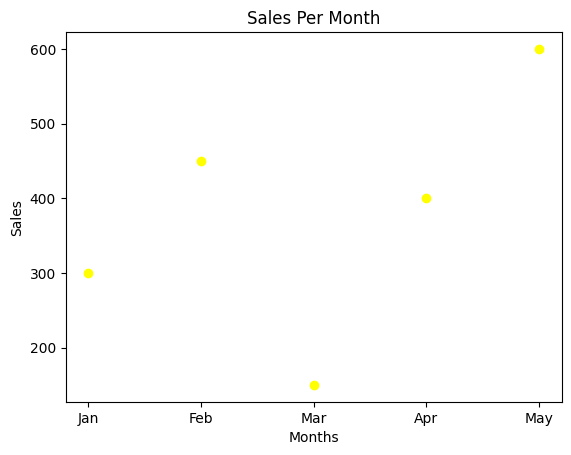

In [29]:
plt.scatter(months,sales,color='yellow')
plt.title('Sales Per Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

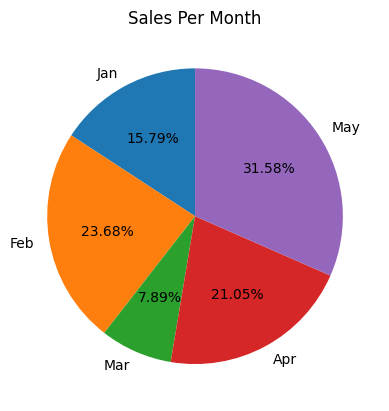

In [35]:
plt.pie(sales,labels=months,autopct='%1.2f%%',startangle=90)
plt.title('Sales Per Month')
plt.show()

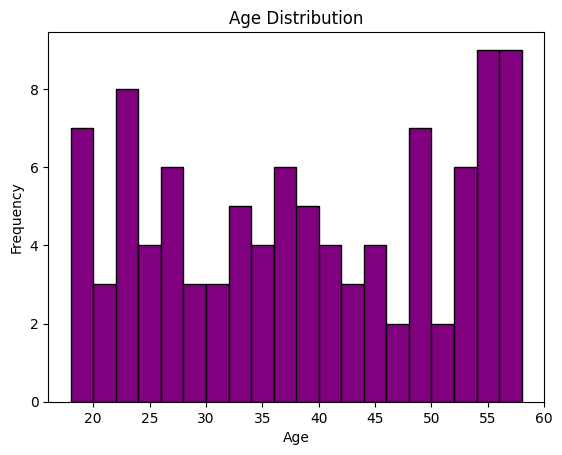

In [57]:
import numpy as np
ages=np.random.randint(18,60,100)
plt.hist(ages,bins=20,color='purple',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

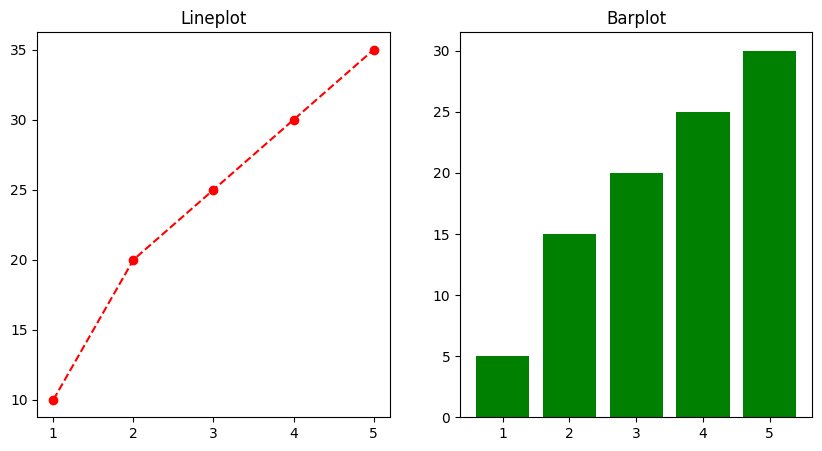

In [68]:
x=[1,2,3,4,5]
y=[10,20,25,30,35]
y2=[5,15,20,25,30]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y,color='red',marker='o',linestyle='--')
plt.title("Lineplot")
plt.subplot(1,2,2)
plt.bar(x,y2,color='green')
plt.title("Barplot")
plt.show()

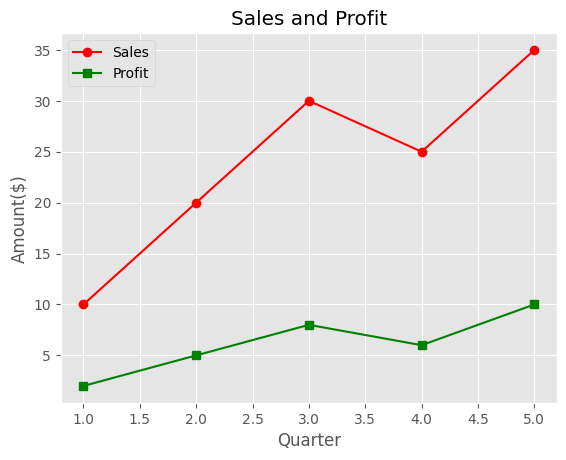

In [71]:
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,20,30,25,35]
profit=[2,5,8,6,10]
plt.plot(x,sales,color='red',marker='o',linestyle='-',label='Sales')
plt.plot(x,profit,color='green',marker='s',linestyle='-',label='Profit')
plt.title('Sales and Profit')
plt.xlabel('Quarter')
plt.ylabel('Amount($)')
plt.legend()
plt.savefig('sales_profit.png')
plt.show()

In [76]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.1
1,60,2020/12/02,117,145,479.0
2,60,2020/12/03,103,135,340.0
3,45,2020/12/04,109,175,282.4
4,45,2020/12/05,117,148,406.0


In [79]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [83]:
df.dtypes

,0
Duration,int64
Date,object
Pulse,int64
Maxpulse,int64
Calories,float64


In [84]:
df.duplicated().sum()

np.int64(1)

In [85]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [86]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 31
Columns: 5


In [87]:
# Parse Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Sort by Date
df = df.sort_values(by='Date')

# Check invalid or missing dates
invalid_dates = df['Date'].isna().sum()
print("Rows with invalid/missing dates:", invalid_dates)


Rows with invalid/missing dates: 1


In [88]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Check missing values
print(df[numeric_cols].isnull().sum())

# Fill missing numeric values with median (robust against outliers)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("Missing values after handling:")
print(df[numeric_cols].isnull().sum())


Duration    0
Pulse       0
Maxpulse    0
Calories    2
dtype: int64
Missing values after handling:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


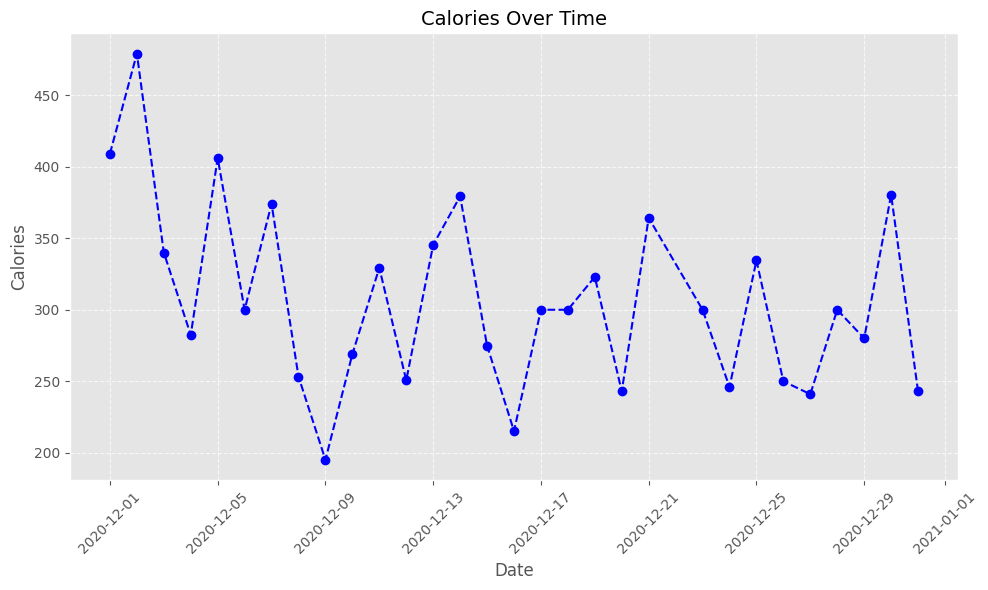

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already cleaned and sorted as 'df'
# and has 'Date' (datetime) and 'Calories' columns

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Calories'], marker='o', linestyle='--', color='b')

# Add labels and title
plt.title('Calories Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Calories', fontsize=12)

# Rotate x-axis ticks
plt.xticks(rotation=45)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Save the figure as PNG
plt.savefig('line_calories_over_time.png', dpi=300)

# Optional: Show the plot
plt.show()


/tmp/ipython-input-1432225427.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse = df.groupby('DurationGroup')['Pulse'].mean().reset_index()


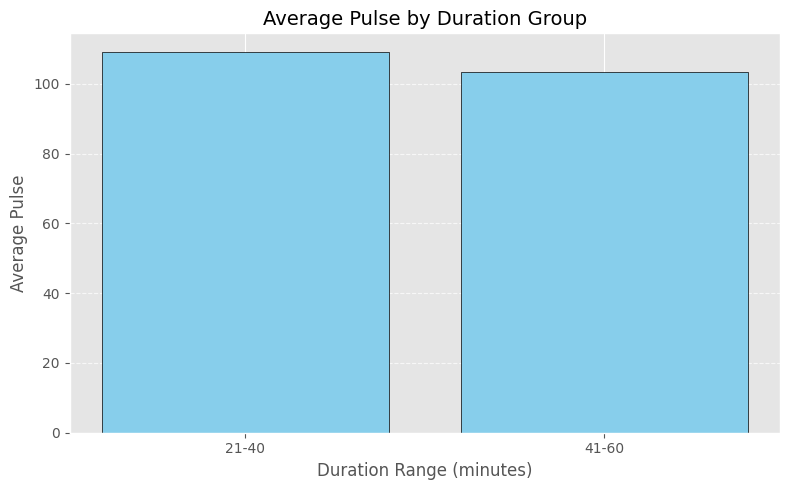

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains columns: 'Duration' and 'Pulse'

# --- Option 1: If Duration is numeric and continuous, create sensible bins ---
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120']
df['DurationGroup'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=True)

# --- Compute average Pulse per Duration group ---
avg_pulse = df.groupby('DurationGroup')['Pulse'].mean().reset_index()

# --- Plot the bar chart ---
plt.figure(figsize=(8, 5))
plt.bar(avg_pulse['DurationGroup'], avg_pulse['Pulse'], color='skyblue', edgecolor='black')

# Add chart details
plt.title('Average Pulse by Duration Group', fontsize=14)
plt.xlabel('Duration Range (minutes)', fontsize=12)
plt.ylabel('Average Pulse', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig('bar_avg_pulse_by_duration.png', dpi=300)

# Optional: display the chart
plt.show()


Pearson correlation (Duration vs Calories): -0.118


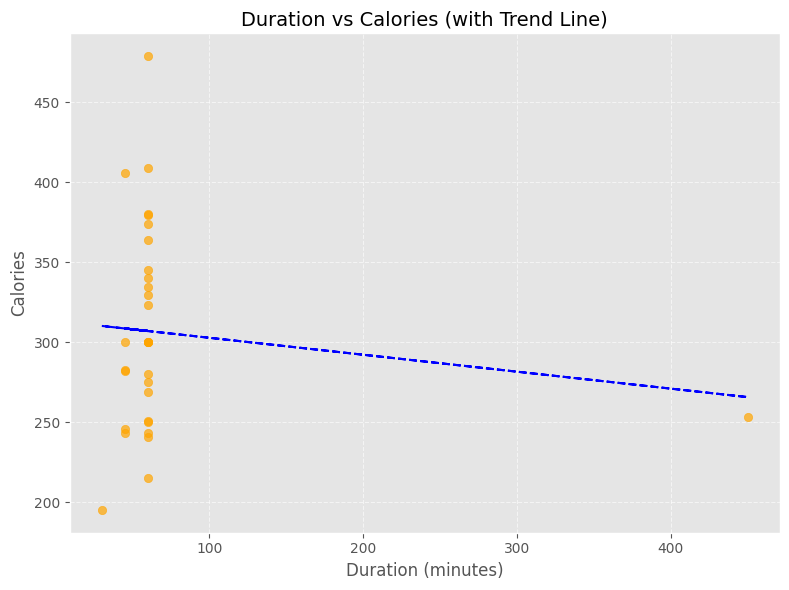

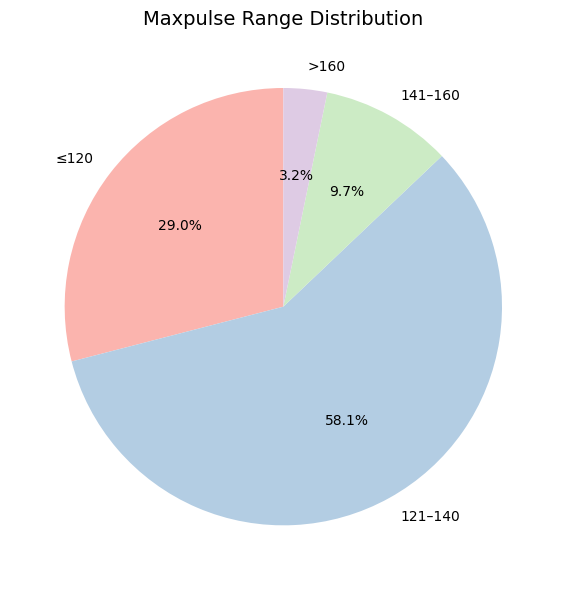

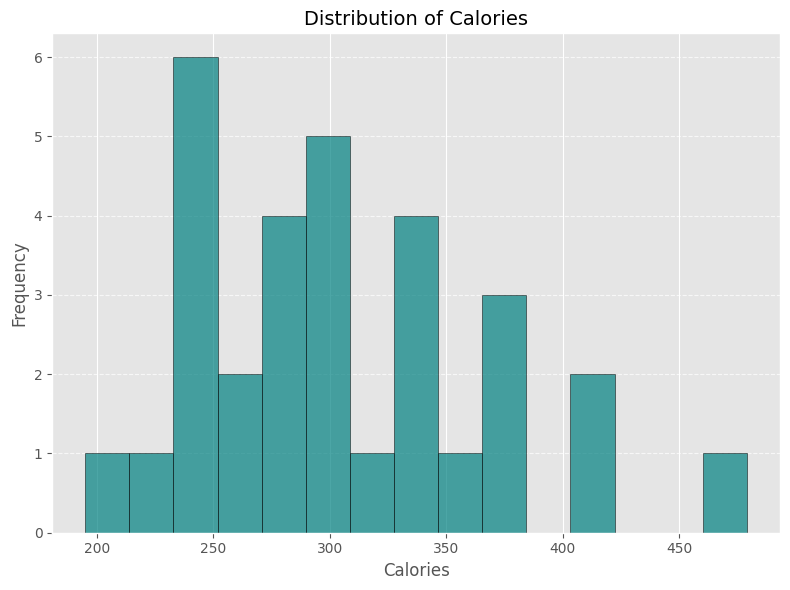

The Calories distribution is right-skewed (positive skew: 0.67).


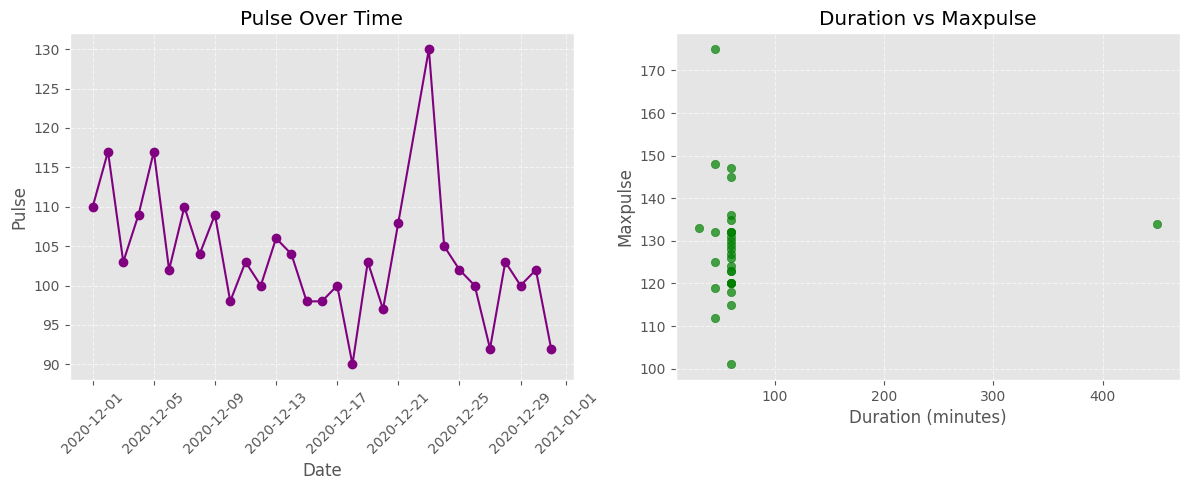

In [91]:
from scipy.stats import pearsonr
#  SCATTER: Duration vs Calories + correlation + trendline
plt.figure(figsize=(8, 6))
plt.scatter(df['Duration'], df['Calories'], color='orange', alpha=0.7)
corr, _ = pearsonr(df['Duration'], df['Calories'])
print(f"Pearson correlation (Duration vs Calories): {corr:.3f}")
z = np.polyfit(df['Duration'], df['Calories'], 1)
p = np.poly1d(z)
plt.plot(df['Duration'], p(df['Duration']), color='blue', linestyle='--')

# Labels and grid
plt.title('Duration vs Calories (with Trend Line)', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Calories', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('scatter_duration_vs_calories.png', dpi=300)
plt.show()


# ===============================
# 2️⃣ PIE CHART: Maxpulse ranges
# ===============================

# Define bins and labels
bins = [0, 120, 140, 160, np.inf]
labels = ['≤120', '121–140', '141–160', '>160']
df['MaxpulseRange'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels)

# Count each range
range_counts = df['MaxpulseRange'].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Maxpulse Range Distribution', fontsize=14)
plt.tight_layout()
plt.savefig('pie_maxpulse_ranges.png', dpi=300)
plt.show()


# ===============================
# 3️⃣ HISTOGRAM: Calories distribution
# ===============================
plt.figure(figsize=(8, 6))
plt.hist(df['Calories'], bins=15, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Calories', fontsize=14)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('hist_calories.png', dpi=300)
plt.show()

# --- Comment on shape/skewness ---
# You can check programmatically:
skewness = df['Calories'].skew()
if skewness > 0:
    print(f"The Calories distribution is right-skewed (positive skew: {skewness:.2f}).")
elif skewness < 0:
    print(f"The Calories distribution is left-skewed (negative skew: {skewness:.2f}).")
else:
    print("The Calories distribution is approximately symmetric.")


# ===============================
# 4️⃣ MULTI-PANEL SUBPLOT (1x2)
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Line plot (Pulse over Date)
axes[0].plot(df['Date'], df['Pulse'], marker='o', linestyle='-', color='purple')
axes[0].set_title('Pulse Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Pulse')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].tick_params(axis='x', rotation=45)

# Right: Scatter (Duration vs Maxpulse)
axes[1].scatter(df['Duration'], df['Maxpulse'], color='green', alpha=0.7)
axes[1].set_title('Duration vs Maxpulse')
axes[1].set_xlabel('Duration (minutes)')
axes[1].set_ylabel('Maxpulse')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('subplots_pulse_duration_maxpulse.png', dpi=300)
plt.show()